# Active Learning Demonstrations - Synthetic Data

The methods of 
* EEM of Zhu, Gharamani and Lafferty
* V-Optimality of Ji and Han
* Sigma-Optimality of Ma, Garnett, and Schneider
adapted to Graph Based Semi-supervised Regression model, instead of Harmonic Functions. (i.e. noisy observations instead of noiseless)

Given observations $\mathbf{y}$ on a subset $\ell \subset Z$ of labeled nodes, the posterior distribution of $\mathbf{u} |\mathbf{y}$ is given by
$$
    \begin{equation*}
        \mathbf{u} | \mathbf{y} \sim \mathcal{N}(\mathbf{m}, C^*)
    \end{equation*}
$$

where $\mathbf{m} = \frac{1}{\gamma^2} C^* H^T\mathbf{y}, C^* = \left( L + \frac{1}{\gamma^2} I \right)^{-1}$.

In [1]:
import sys
sys.path.append('../')
from util.util import *
from datasets.dataloaders import *
from util.al_util import *
%load_ext autoreload

In [2]:
%autoreload

# 2 Moons

Loading the 2 moons data with 1002 total points...
Creating Laplacian
Finished making Laplacian, now calculating the eval/evecs
Converting to dense since computing more than half of eigenvectors...


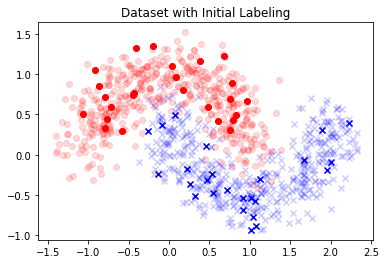

In [29]:
# Setup
N = 1000
moon_data = load_2_moons(N+2)
moon_data.plot_initial()

In [30]:
# Model Setup
tau, alpha, gamma = 0.01, 1.0, 0.001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 5
tag2 = (tau, alpha, gamma2)
test_opts = (batch_size, num_iters, verbose)

calc_orig_multi took 0.110950 seconds
Iter = 0


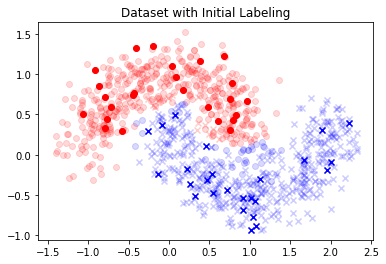

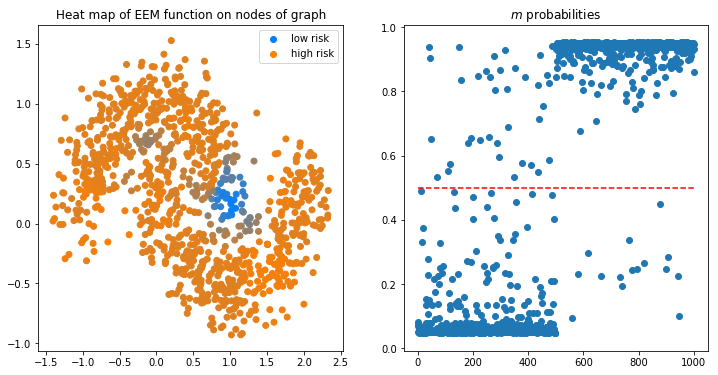

Iter = 1


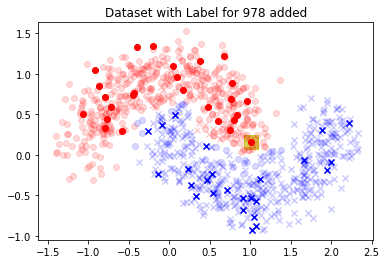

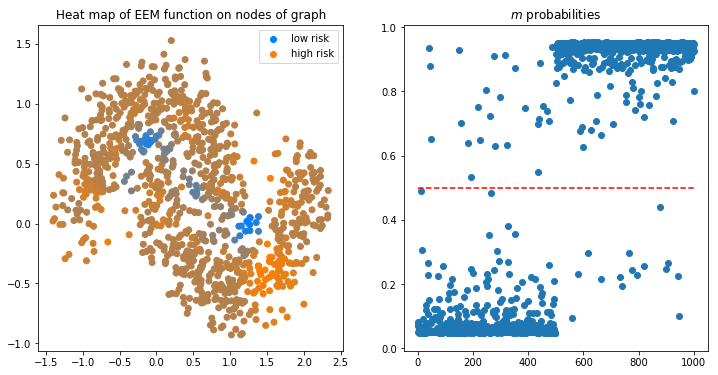

Iter = 2


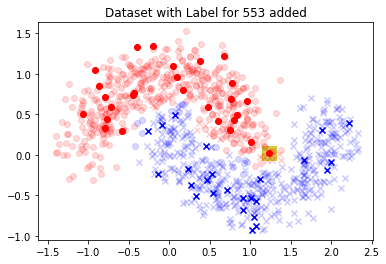

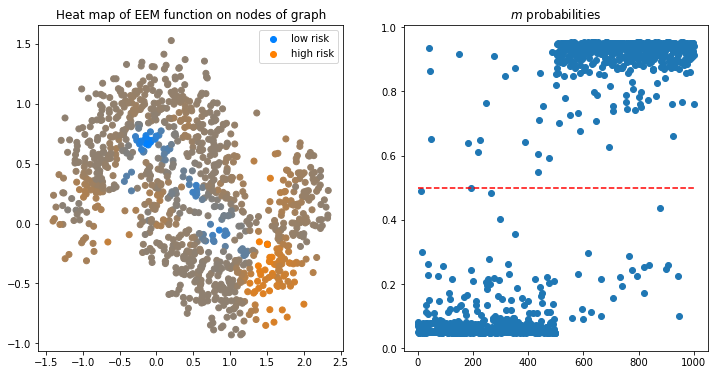

Iter = 3


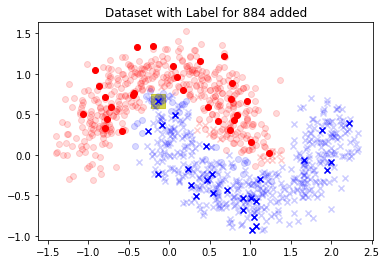

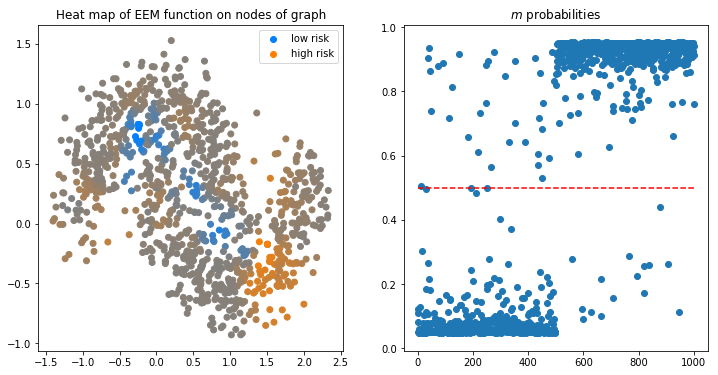

Iter = 4


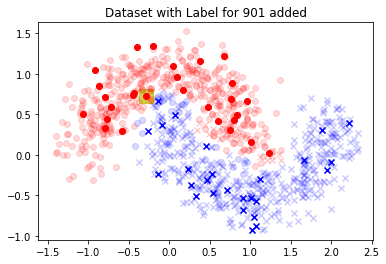

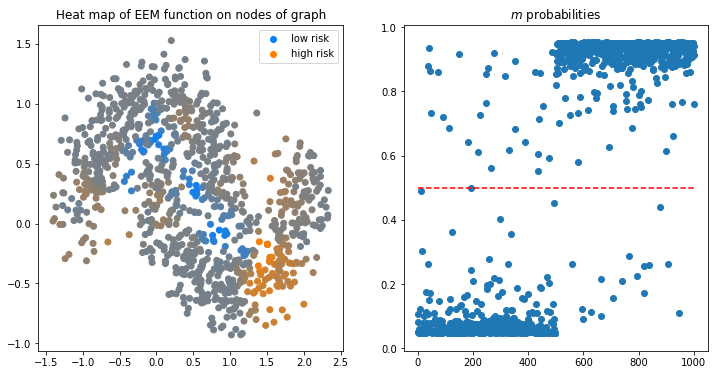

Iter = 5


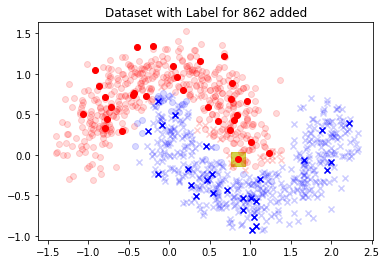

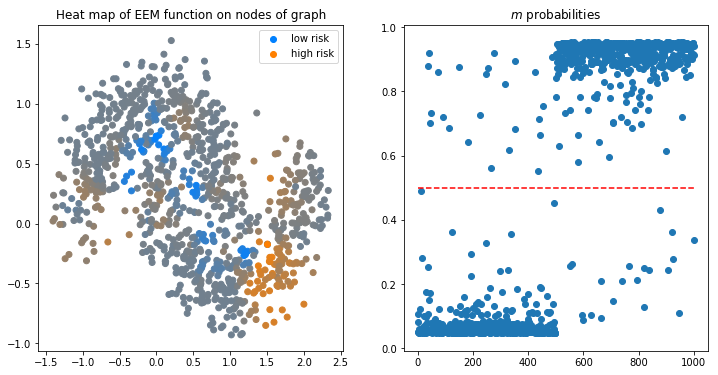

Iter = 6


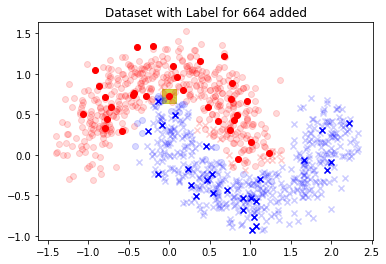

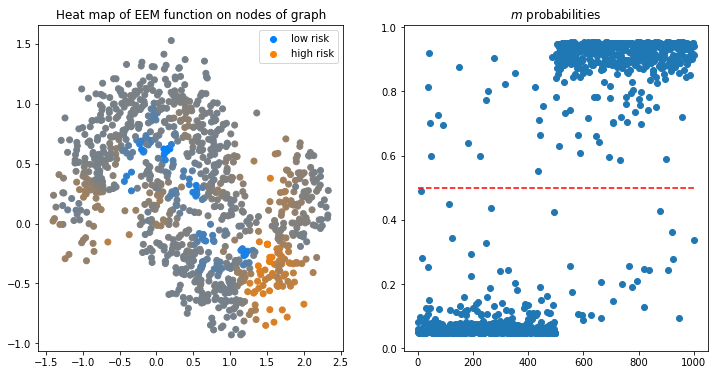

Iter = 7


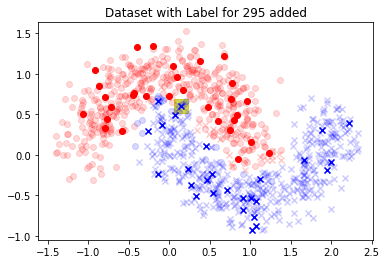

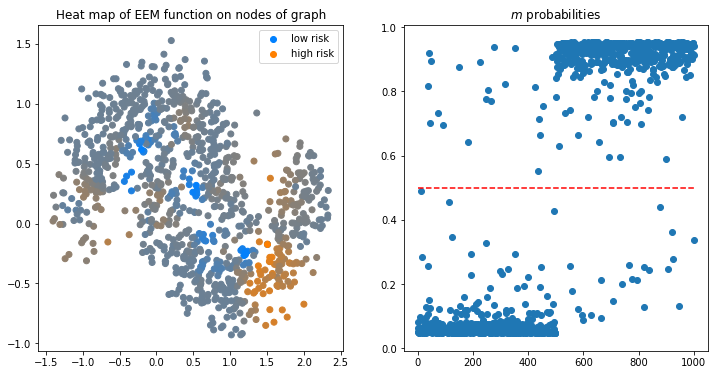

Iter = 8


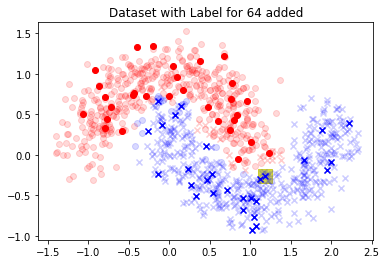

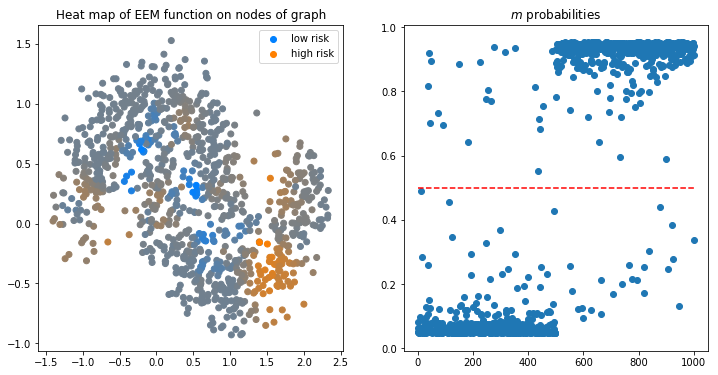

Iter = 9


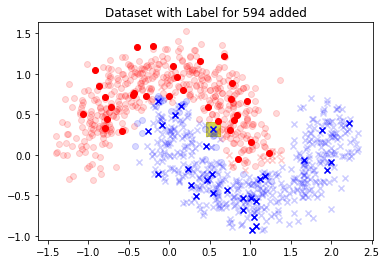

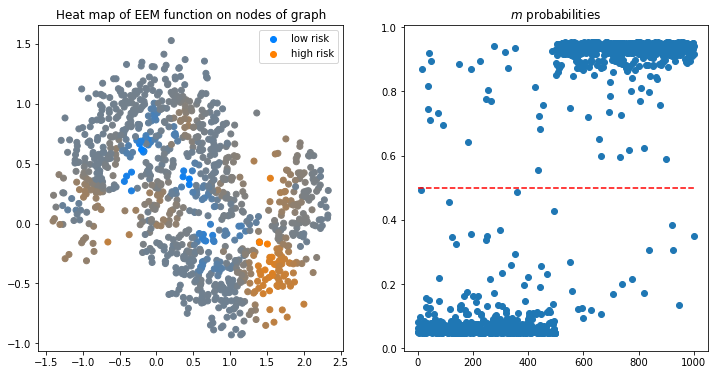

Iter = 10


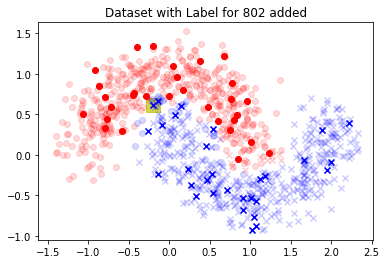

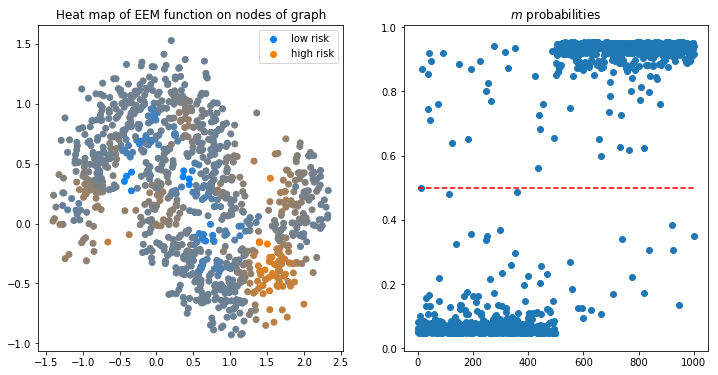

Iter = 11


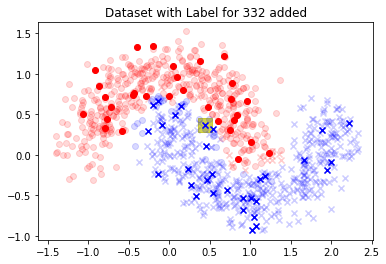

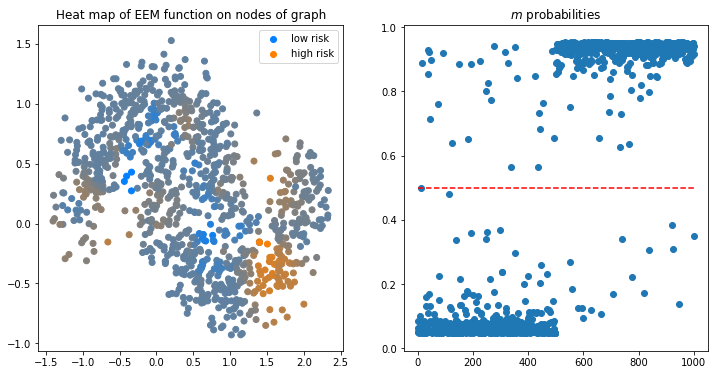

Iter = 12


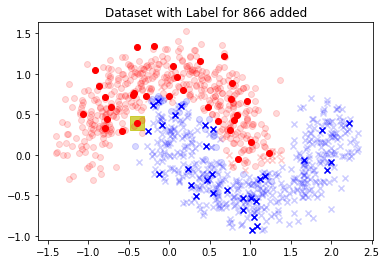

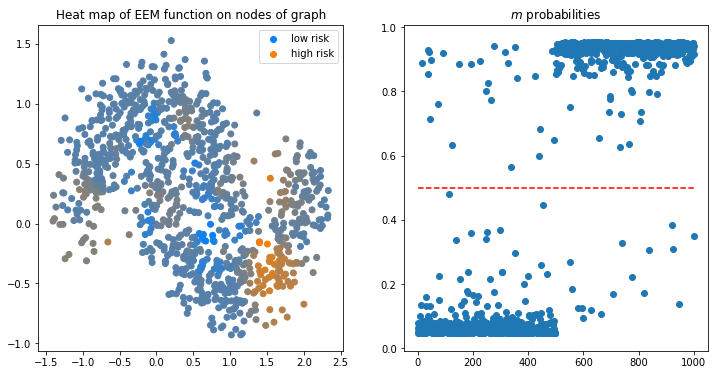

Iter = 13


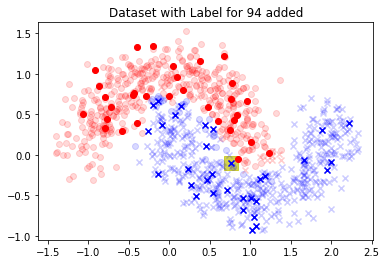

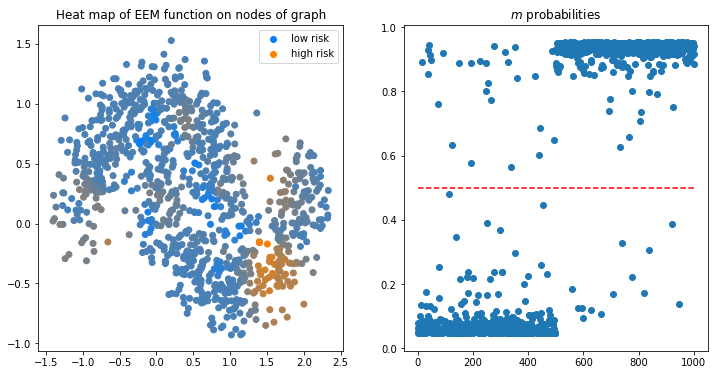

Iter = 14


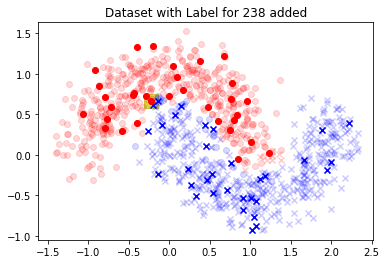

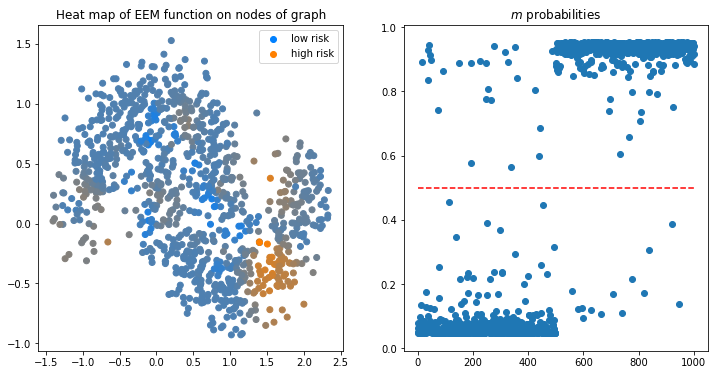

Iter = 15


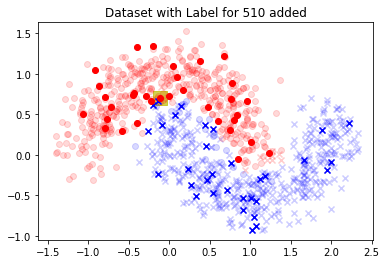

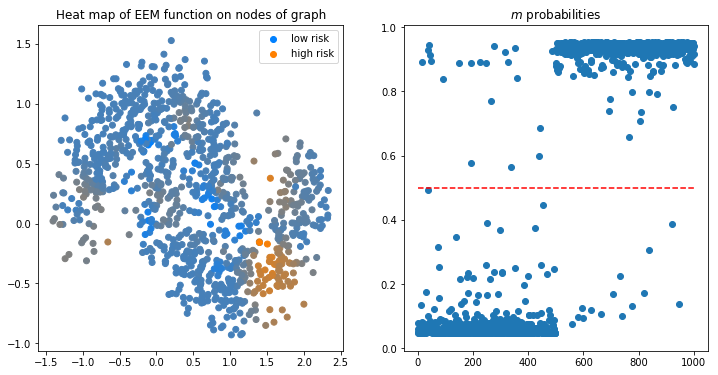

Iter = 16


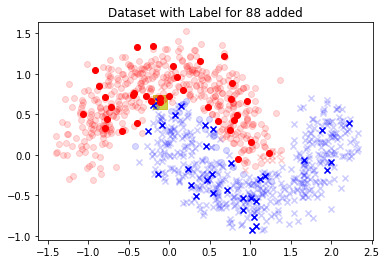

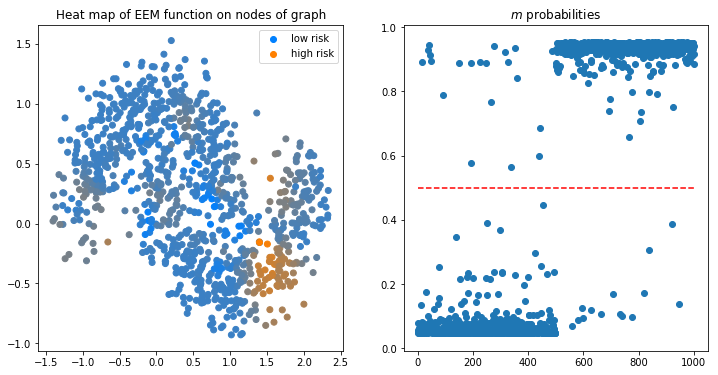

Iter = 17


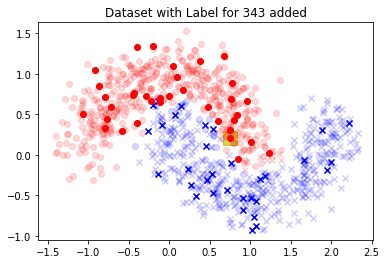

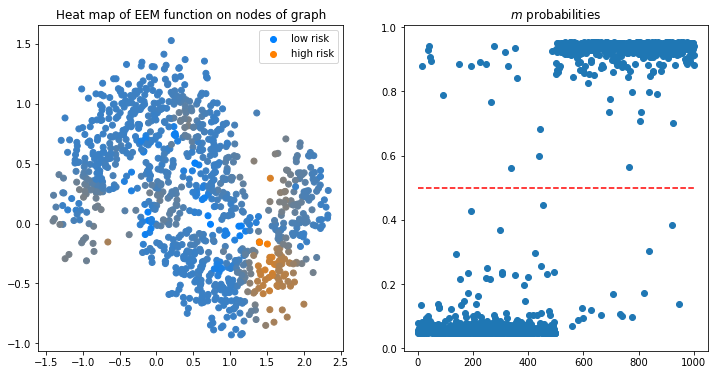

Iter = 18


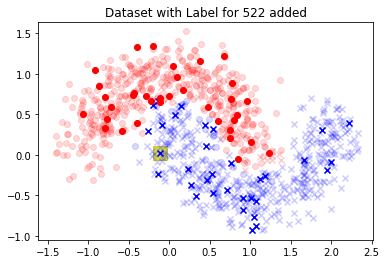

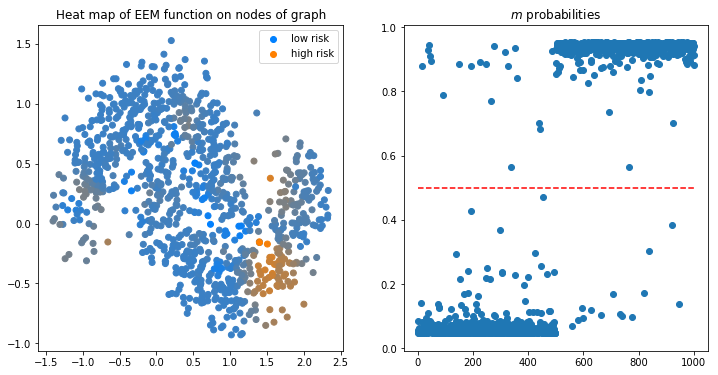

Iter = 19


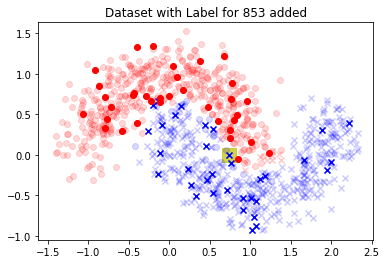

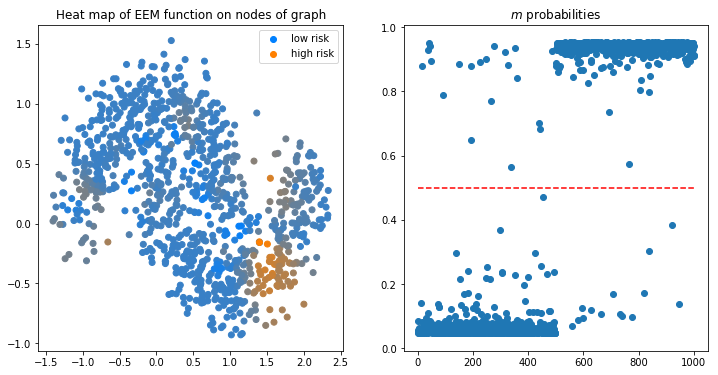

Iter = 20


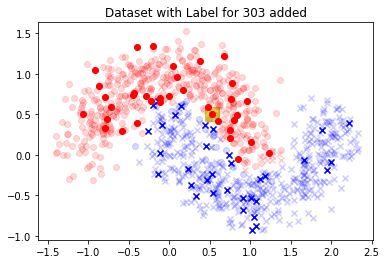

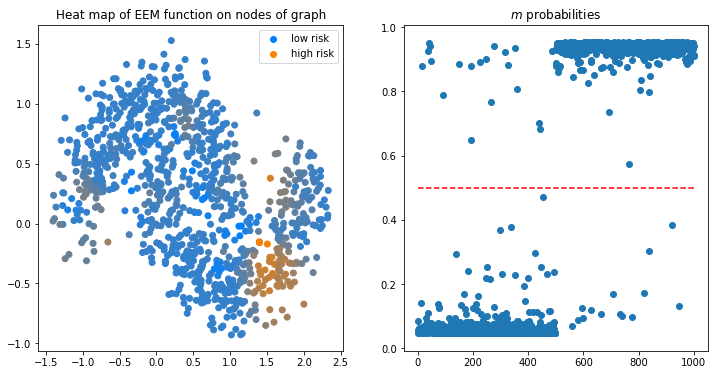

[(-1, 0.05289421157684631), (978, 0.041916167664670656), (553, 0.041916167664670656), (884, 0.0499001996007984), (901, 0.04590818363273453), (862, 0.04491017964071856), (664, 0.04291417165668663), (295, 0.043912175648702596), (64, 0.043912175648702596), (594, 0.041916167664670656), (802, 0.043912175648702596), (332, 0.046906187624750496), (866, 0.04291417165668663), (94, 0.041916167664670656), (238, 0.03992015968063872), (510, 0.03592814371257485), (88, 0.03592814371257485), (343, 0.03493013972055888), (522, 0.03493013972055888), (853, 0.03592814371257485), (303, 0.03493013972055888)]


In [31]:
# Active Learning Choices  -- EEM
fid = copy.deepcopy(moon_data.fid)
ERRS, M = run_test_AL(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth, 
                               tag2=tag2, test_opts=(num_iters, verbose))

if verbose:
    print(ERRS)

calc_orig_multi took 0.100975 seconds
Iter = 0


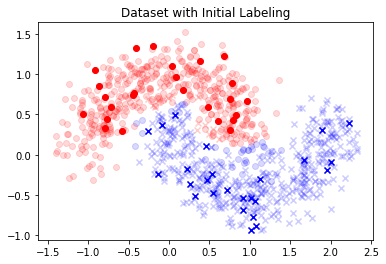

Time for V_opt = 0.004050
Time for V_opt = 0.001676
Time for V_opt = 0.006072
Time for V_opt = 0.004710
Time for V_opt = 0.002940
Iter = 1


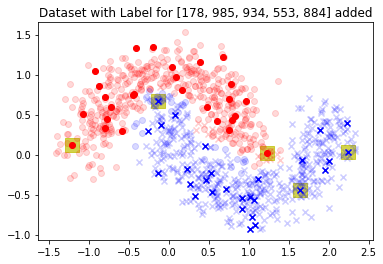

Time for V_opt = 0.003722
Time for V_opt = 0.003831
Time for V_opt = 0.004556
Time for V_opt = 0.003138
Time for V_opt = 0.003325
Iter = 2


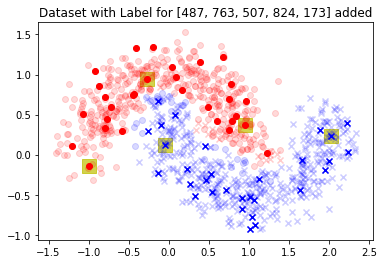

Time for V_opt = 0.003528
Time for V_opt = 0.003672
Time for V_opt = 0.003664
Time for V_opt = 0.004587
Time for V_opt = 0.003629
Iter = 3


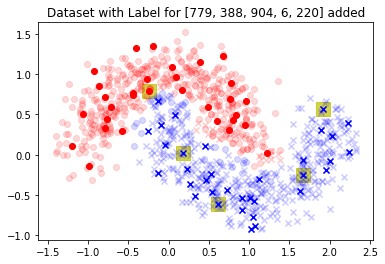

Time for V_opt = 0.002413
Time for V_opt = 0.003261
Time for V_opt = 0.003022
Time for V_opt = 0.002699
Time for V_opt = 0.004289
Iter = 4


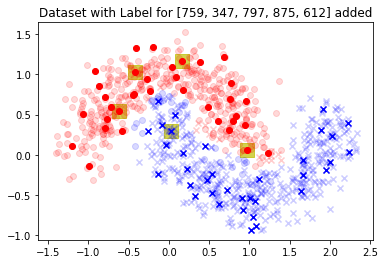

[(-1, 0.05289421157684631), ([178, 985, 934, 553, 884], 0.05089820359281437), ([487, 763, 507, 824, 173], 0.0499001996007984), ([779, 388, 904, 6, 220], 0.0499001996007984), ([759, 347, 797, 875, 612], 0.04890219560878244)]


In [32]:
# Active Learning Choices  -- V_Opt
fid = copy.deepcopy(moon_data.fid)
method = 'V'
ERRS_V, M_V = run_test_AL_VS_multi(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth,
                                   method=method, tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_V)

calc_orig_multi took 0.104166 seconds
Iter = 0


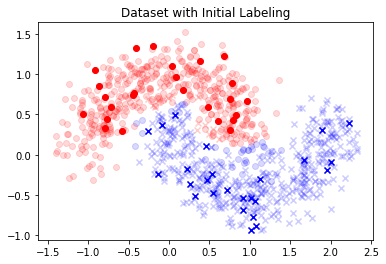

Time for S_opt = 0.007302
Time for S_opt = 0.009944
Time for S_opt = 0.007067
Time for S_opt = 0.008649
Time for S_opt = 0.007148
Iter = 1


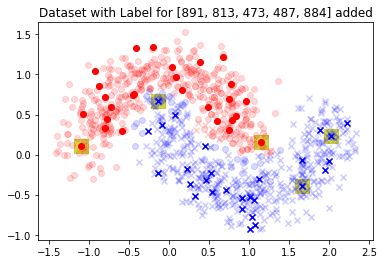

Time for S_opt = 0.007743
Time for S_opt = 0.008814
Time for S_opt = 0.008166
Time for S_opt = 0.010707
Time for S_opt = 0.010699
Iter = 2


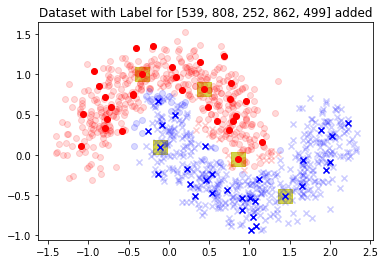

Time for S_opt = 0.007600
Time for S_opt = 0.006874
Time for S_opt = 0.008870
Time for S_opt = 0.010413
Time for S_opt = 0.010783
Iter = 3


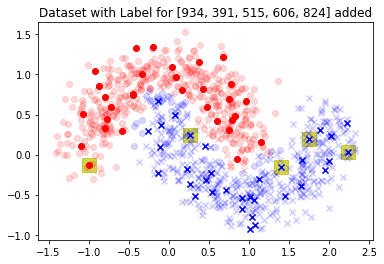

Time for S_opt = 0.007277
Time for S_opt = 0.007031
Time for S_opt = 0.008186
Time for S_opt = 0.008123
Time for S_opt = 0.007260
Iter = 4


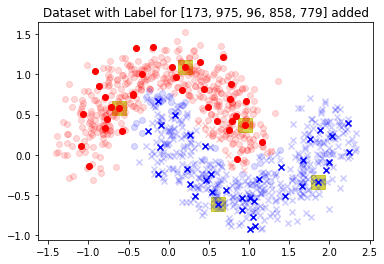

[(-1, 0.05289421157684631), ([891, 813, 473, 487, 884], 0.04890219560878244), ([539, 808, 252, 862, 499], 0.04890219560878244), ([934, 391, 515, 606, 824], 0.046906187624750496), ([173, 975, 96, 858, 779], 0.04590818363273453)]


In [33]:
# Active Learning Choices  -- Sigma_Opt
fid = copy.deepcopy(moon_data.fid)
method = 'S'
ERRS_S, M_S = run_test_AL_VS_multi(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth, 
                                   method='S', tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_S)

In [34]:
# Random choices
fid = copy.deepcopy(moon_data.fid)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(moon_data.X, moon_data.evecs, moon_data.evals, fid, moon_data.ground_truth, 
                                        tag2=tag2, test_opts=(num_iters, False), show_all_iters=show_all_iters)
if verbose:
    print(ERRS_rand)

[(-1, 0.05289421157684631), (51, 0.05289421157684631), (710, 0.05688622754491018), (874, 0.05688622754491018), (405, 0.05688622754491018), (425, 0.05688622754491018), (994, 0.05688622754491018), (444, 0.05788423153692615), (611, 0.05688622754491018), (31, 0.05688622754491018), (914, 0.05688622754491018), (679, 0.05588822355289421), (973, 0.05588822355289421), (658, 0.05588822355289421), (354, 0.05588822355289421), (849, 0.05588822355289421), (387, 0.04491017964071856), (969, 0.04491017964071856), (777, 0.04491017964071856), (8, 0.04491017964071856), (896, 0.04491017964071856)]


## Error Plotting - 2 Moons 

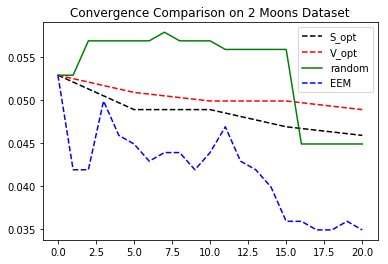

In [35]:
colors = ['y', 'r', 'k', 'g']
ids, errs =zip(*ERRS)
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
num_batches = int(num_iters / batch_size)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'k--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.plot([i for i in range(num_iters+1)], errs, 'b--', label='EEM')
plt.legend()
plt.title('Convergence Comparison on 2 Moons Dataset')
plt.show()

# 2 Gaussian Clusters

In [36]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [200,200]
N = sum(Ns)
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

g2_data = load_gaussian_cluster(Ns, means, Covs, normed_lap=True)

# Model Setup
tau, alpha, gamma = 0.1, 1.0, 0.01
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 10
batch_size = 5
tag2 = (tau, alpha, gamma2)

Loading the Gaussian Cluster data with 2 clusters...
Creating Laplacian
Finished making Laplacian, now calculating the eval/evecs
Converting to dense since computing more than half of eigenvectors...


calc_orig_multi took 0.008121 seconds
Iter = 0


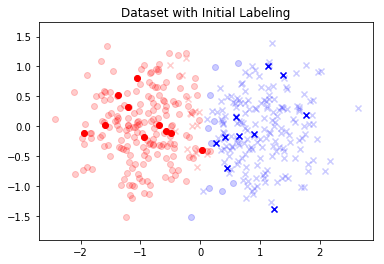

Time for S_opt = 0.001192
Time for S_opt = 0.001606
Time for S_opt = 0.001736
Time for S_opt = 0.001707
Time for S_opt = 0.001650
Iter = 1


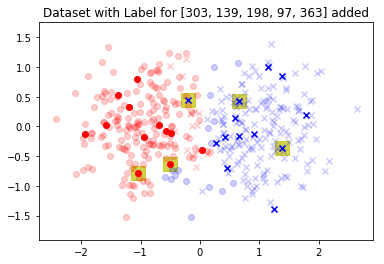

Time for S_opt = 0.001877
Time for S_opt = 0.001376
Time for S_opt = 0.001619
Time for S_opt = 0.001567
Time for S_opt = 0.001571
Iter = 2


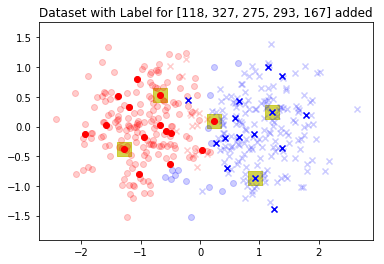

[(-1, 0.0675), ([303, 139, 198, 97, 363], 0.08250000000000002), ([118, 327, 275, 293, 167], 0.08499999999999996)]


In [37]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(g2_data.fid)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(g2_data.X, g2_data.evecs, g2_data.evals, fid, g2_data.ground_truth, 
                                   method, tag2, test_opts)

if verbose:
    print(ERRS_S)

In [38]:
g2_data.fid[-1] = g2_data.fid[0]
del g2_data.fid[0]
g2_data.ground_truth[g2_data.ground_truth == 0] = -1

calc_orig_multi took 0.009546 seconds
Iter = 0


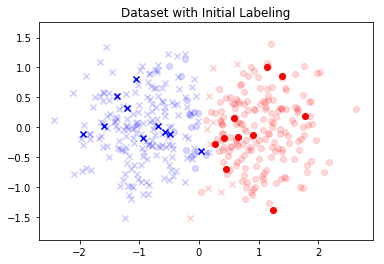

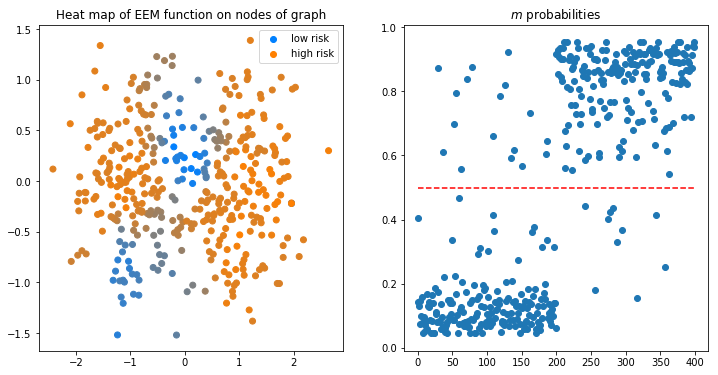

Iter = 1


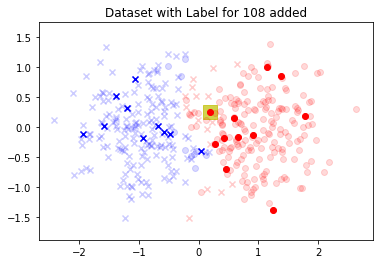

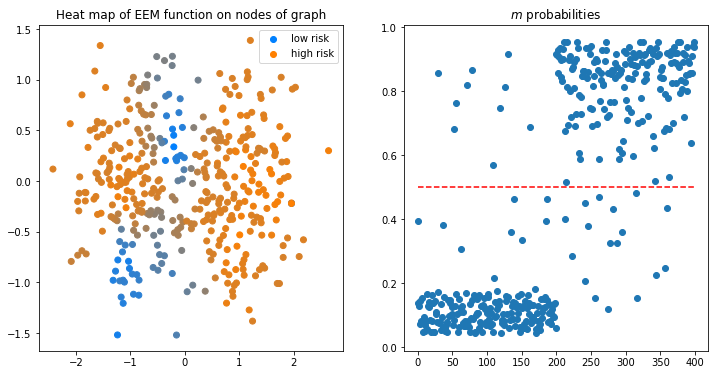

Iter = 2


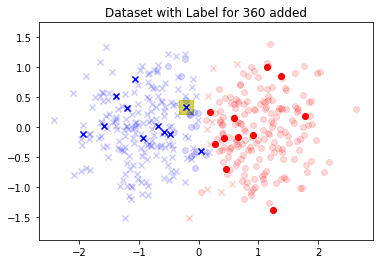

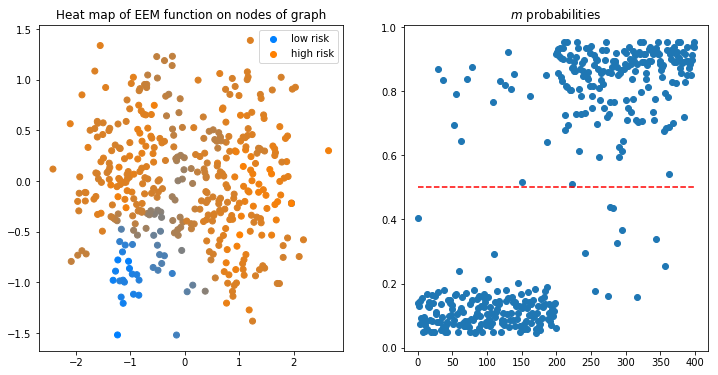

Iter = 3


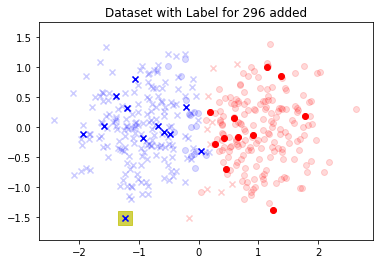

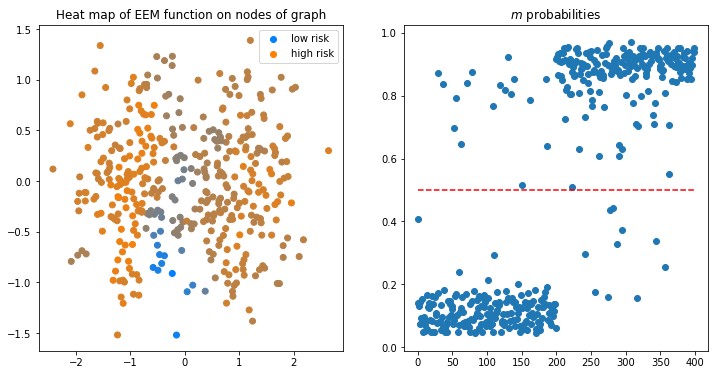

Iter = 4


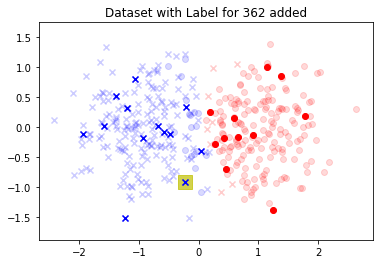

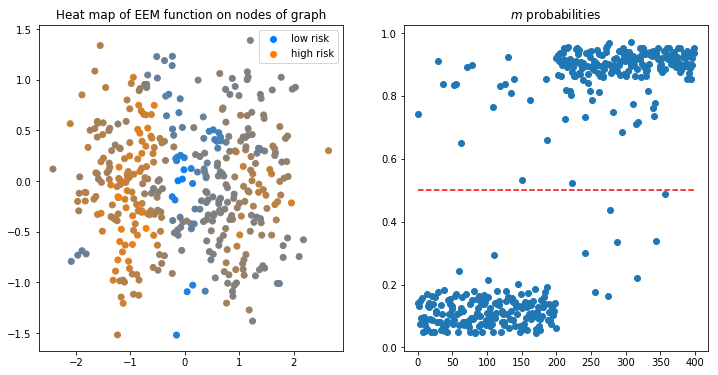

Iter = 5


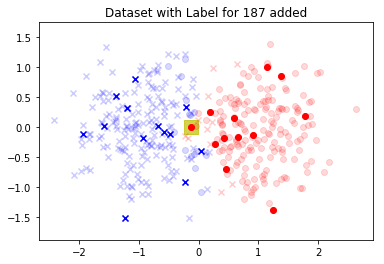

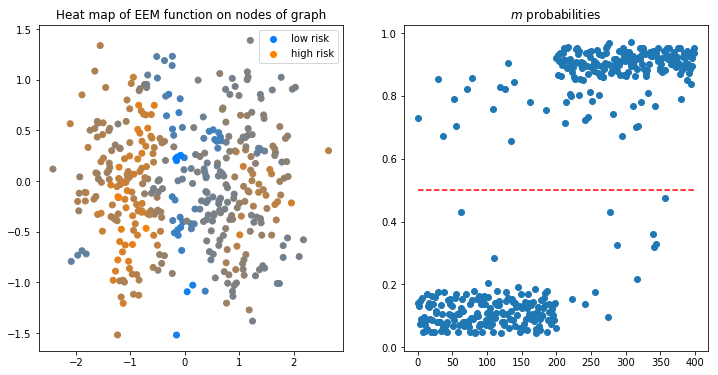

Iter = 6


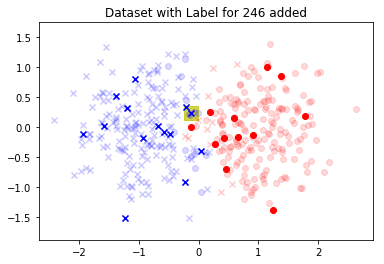

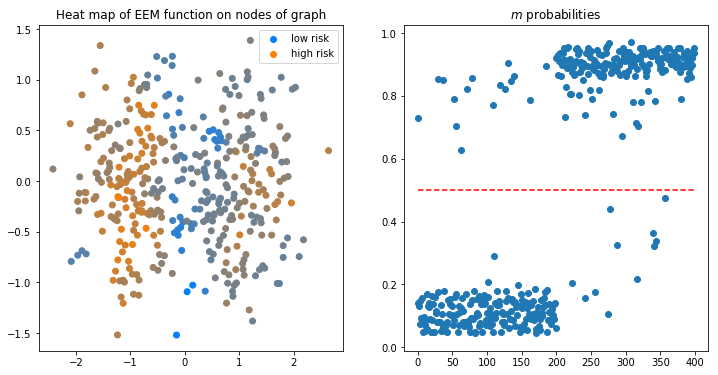

Iter = 7


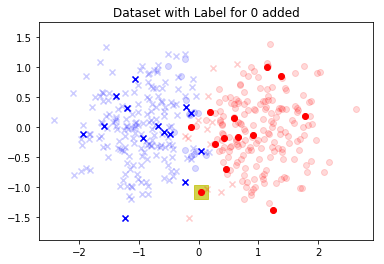

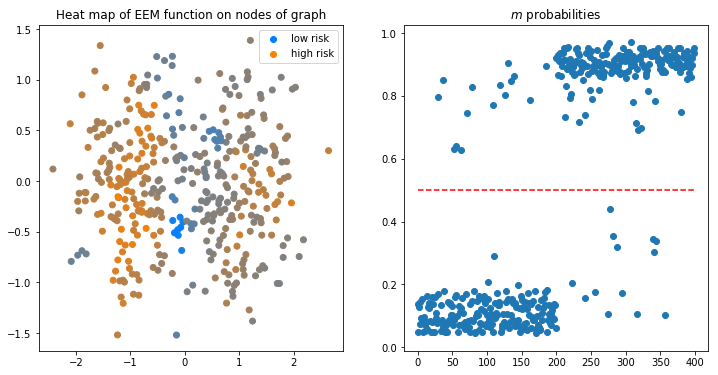

Iter = 8


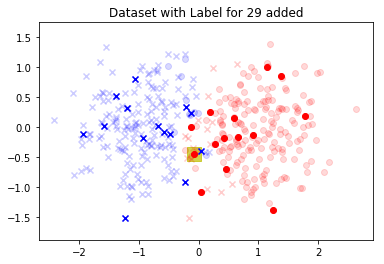

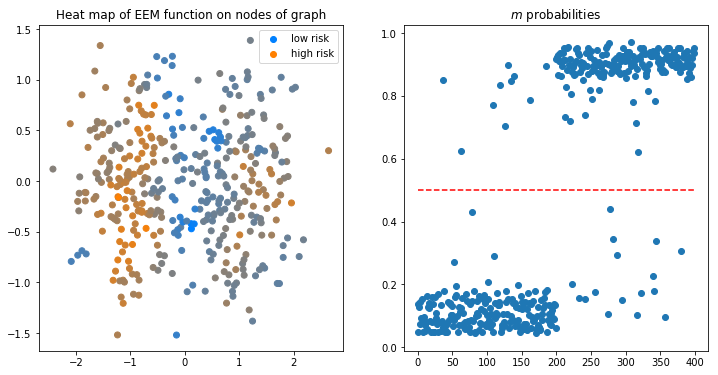

Iter = 9


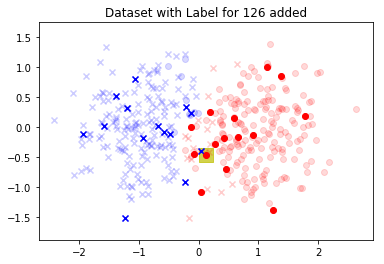

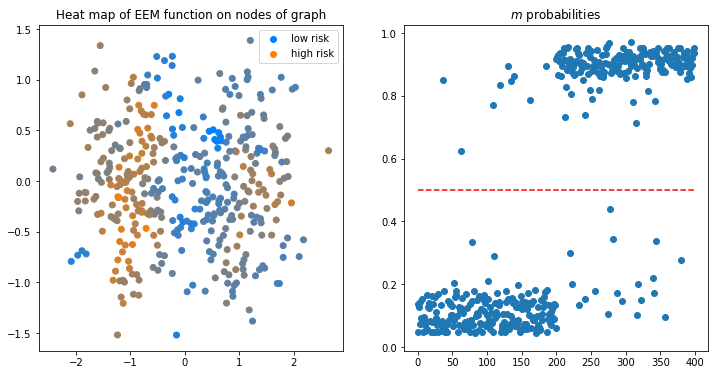

Iter = 10


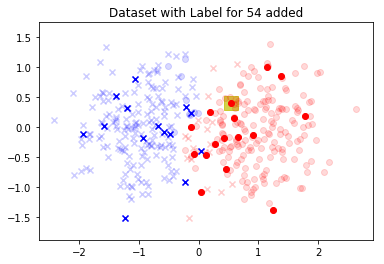

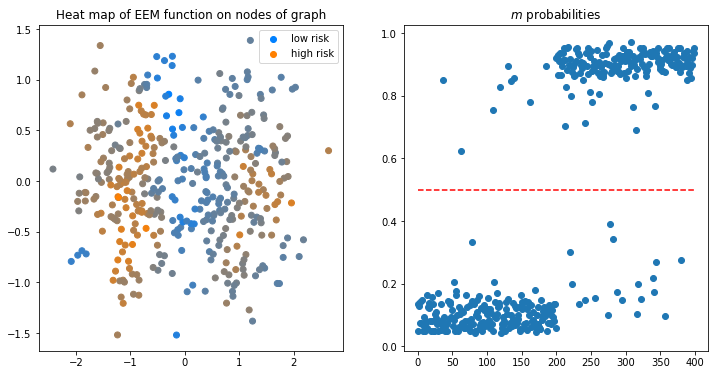

[(-1, 0.0675), (108, 0.0675), (360, 0.0675), (296, 0.0675), (362, 0.065), (187, 0.065), (246, 0.0675), (0, 0.07), (29, 0.065), (126, 0.0675), (54, 0.0675)]


In [39]:
# Active Learning - EEM binary class
fid = copy.deepcopy(g2_data.fid)
test_opts = (num_iters, verbose)
ERRS, M = run_test_AL(g2_data.X, g2_data.evecs, g2_data.evals, fid, g2_data.ground_truth, 
                        tag2, test_opts)

if verbose:
    print(ERRS)

# Gaussian Clusters Example - 3 clusters

Note now we don't calculate the EEM method for choosing queries because we haven't generalized the 0-1 risk calculation of Zhu et al for the multiclass case. So in the multiclass case we are just showing V and $\Sigma$ optimality choices.

Loading the Gaussian Cluster data with 3 clusters...
Creating Laplacian
Finished making Laplacian, now calculating the eval/evecs
Converting to dense since computing more than half of eigenvectors...


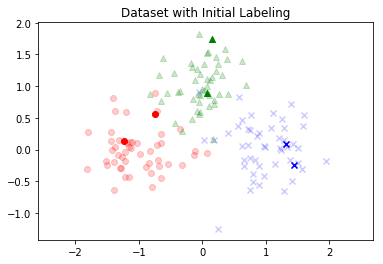

In [51]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [50,50,50]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.]), np.array([0.,1.0])]
Covs = [0.15*np.eye(2), 0.15*np.eye(2), 0.15*np.eye(2)]
data = load_gaussian_cluster(Ns, means, Covs)
data.plot_initial()

In [52]:
# Model Setup
tau, alpha, gamma = 0.1, 1.0, 0.001
gamma2 = gamma**2.
tag2 = (tau, alpha, gamma2)
verbose = False     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 5



In [53]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(data.fid)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(data.X, data.evecs, data.evals, fid, data.ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_S)

# Active Learning - V optimal multiclass
fid = copy.deepcopy(data.fid)
method = 'V'
test_opts = (batch_size, num_iters, verbose)
ERRS_V, M_V = run_test_AL_VS_multi(data.X, data.evecs, data.evals, fid, data.ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_V)

fid = copy.deepcopy(data.fid)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, False)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(data.X, data.evecs, data.evals, fid, data.ground_truth, tag2, 
                                        test_opts, show_all_iters=show_all_iters)

if verbose:
    print(ERRS_rand)

## Convergence Comparison

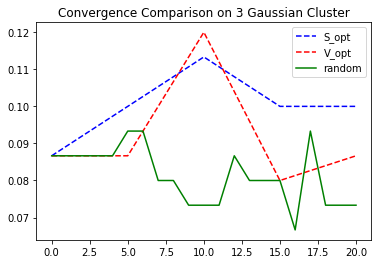

In [56]:
num_batches = int(num_iters/batch_size)
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'b--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.title('Convergence Comparison on 3 Gaussian Cluster')
plt.legend()